# Esame di Probabilità e Statistica
## Matteo Robbiati

### Indice:

- 1. Caricamento delle tabelle e selezione dei dati;
- 2. Analisi qualitativa dei dati;
- 3. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import gender_guesser.detector as gender
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as sc
import geoplot
import geopandas



# 1. Caricamento delle tabelle e selezione dei dati

In [363]:
plt.rcParams.update({'font.size': 18})

sns.set_theme(font_scale=1.3, style='whitegrid') 
#sns.set_theme(style="whitegrid")
file = 'Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx'

#### Tabelle con resoconti mensili e suddivisione per genere

In [3]:
df_tot_mese = pd.read_excel(file, header=1, sheet_name='Totale per mese')
df_tot_sesso = pd.read_excel(file, header=1, sheet_name='Totale per sesso')

#### Tabelle per età 65+

In [4]:
df_65_tot = pd.read_excel(file, header=1, sheet_name='Età65+ Totale')
df_65_mas = pd.read_excel(file, header=1, sheet_name='Età65+ Maschi')
df_65_fem = pd.read_excel(file, header=1, sheet_name='Età65+ Femmine')

#### Funzione di controllo delle pagine del file excel

Ho scritto una funzione che ha il compito di controllare che i nomi dei comuni delle righe $i$ dellediverse  pagine del foglio excel coincidano.

In [5]:
def controlla_file(df1, df2, df3, df4, df5):
    flag=0
    for i in range(len(df1)):
        if(df1.NOME_COMUNE[i] == df2.NOME_COMUNE[i] and df1.NOME_COMUNE[i] == df3.NOME_COMUNE[i] and df1.NOME_COMUNE[i] == df4.NOME_COMUNE[i] and df1.NOME_COMUNE[i] == df4.NOME_COMUNE[i]):
            flag+=0
        else:
            flag+=1
            
    if(flag==0):
        print('MOLTO BENE, TUTTI I COMUNI CORRISPONDONO NEI DIVERSI FOGLI DI EXCEL, PUOI PROCEDERE!')
        
controlla_file(df_tot_mese, df_tot_sesso, df_65_tot, df_65_mas, df_65_fem)

MOLTO BENE, TUTTI I COMUNI CORRISPONDONO NEI DIVERSI FOGLI DI EXCEL, PUOI PROCEDERE!


## 1.1 Definisco alcuni DataFrame personalizzati
### 1.1.1 DataFrame comuni

**NOTA:** il numero di decessi totali considerati è, in ciascuna delle colonne, riferito ai mesi marzo, aprile, maggio e giugno (qualsiasi sia l'anno di riferimento). Questo dataframe considera i valori calcolati per ciascun comune. Inoltre, il valore riportato sotto legenda <font color='brown'>[1519]</font> fa riferimento alla dei decessi calcolata sui dati registrati negli anni 2015-1019.

Costruisco un DataFrame, che chiamo <font color='brown'>[mydf]</font>, contenente: 

- 1. **regione** <font color='brown'>[mydf.Regione]</font>;
- 2. **provincia** <font color='brown'>[mydf.Provincia]</font>;
- 3. **nome comune** <font color='brown'>[mydf.Comune]</font>;
- 4. **fascia geografica** <font color='brown'>[mydf.Fascia_geografica]</font>: ho suddiviso l'italia in tre fascie, sfruttando i codici numerici delle regioni, forniti dalle tabelle scaricate per l'esame. Questi codici sono numerati in modo tale che le regioni indicate dal range [1,7] siano localizzate a Nord, quelle corrispondenti al range [8,12] siano localizzate al Centro e il range [13,20] si riferisca a Sud e isole;
- 5. **decessi totali 2015-2019** <font color='brown'>[mydf.Totali_1519]</font>;
- 6. **decessi totali anno 2020** <font color='brown'>[mydf.Totali_2020]</font>;
- 7. **decessi totali uomini 2015-2019** <font color='brown'>[mydf.Uomini_1519]</font>;
- 8. **decessi totali donne 2015-2019** <font color='brown'>[mydf.Donne_1519]</font>;
- 9. **decessi totali uomini 2020** <font color='brown'>[mydf.Uomini_2020]</font>;
- 10. **decessi totali donne 2020** <font color='brown'>[mydf.Uomini_2020]</font>;
- 11. **incremento dei decessi totale** <font color='brown'>[mydf.Incremento_totale]</font>: per ottenere questi valori ho utilizzato l'incremento di uomini+donne, riportato dalla tabella apposita, caricata come df_tot_sesso. Ho scelto di normalizzare i valori dell'incremento dividendoli per 100;
- 12. **incremento dei decessi donne** <font color='brown'>[mydf.Incremento_donne]</font>;
- 13. **incremento dei decessi donne** <font color='brown'>[mydf.Incremento_donne]</font>;


In [6]:
N = len(df_tot_mese)

morti_per_comune_1519 = list()               #decessi totali per comune media 2015-2019
morti_per_comune_2020  = list()              #decessi totali per comune anno 2020

morti_fem_1519 = list()                      #decessi totali per comune donne 2015-2019
morti_mas_1519 = list()                      #decessi totali per comune uomini 2015-2019

morti_fem_2020 = list()                      #decessi totali per comune donne 2020
morti_mas_2020 = list()                      #decessi totali per comune uomini 2020
    
fascia_geo = list()                          #lista per definire la colonna: Fascia Geografica (Nord, Centro, Sud)

incremento = list()                          #incremento dei decessi totale (Uomini+Donne) per comune
incremento_mas = list()                      #incremento dei decessi uomini
incremento_fem = list()                      #incremento dei decessi donne


for i in range(N):
    
    fem_1519 = df_tot_sesso.iloc[i, 6]
    mas_1519 = df_tot_sesso.iloc[i, 7]
    fem_2020 = df_tot_sesso.iloc[i, 9]
    mas_2020 = df_tot_sesso.iloc[i, 10]
    
    morti_1519  = fem_1519 + mas_1519
    morti_2020  = fem_2020 + mas_2020
    
    morti_per_comune_1519.append(morti_1519)
    morti_per_comune_2020.append(morti_2020)
    
    morti_mas_1519.append(mas_1519)
    morti_fem_1519.append(fem_1519)
    
    morti_fem_2020.append(fem_2020)
    morti_mas_2020.append(mas_2020)


for i in range(N):
    
    if(df_tot_sesso.iloc[i,14]=='-'):                        #sostituisco '-' con '0', 
        df_tot_sesso.iloc[i,14]=0.                           #riportando a 'double' la colonna  

    if(df_tot_sesso.iloc[i,12]=='-'):                        #sostituisco '-' con '0', 
        df_tot_sesso.iloc[i,12]=0.                           #riportando a 'double' la colonna  
        
    if(df_tot_sesso.iloc[i,13]=='-'):                        #sostituisco '-' con '0', 
        df_tot_sesso.iloc[i,13]=0.                           #riportando a 'double' la colonna  
    
    incremento.append(df_tot_sesso.iloc[i, 14]/100.)         #normalizzo le percentuali
    incremento_mas.append(df_tot_sesso.iloc[i, 12]/100.)
    incremento_fem.append(df_tot_sesso.iloc[i, 13]/100.)

    
for i in range(N):
    if(df_tot_mese.iloc[i,0]<=7):
        fascia_geo.append('Nord')
    if(df_tot_mese.iloc[i,0]>7 and df_tot_mese.iloc[i,0]<=12):
        fascia_geo.append('Centro')
    if(df_tot_mese.iloc[i,0]>12):
        fascia_geo.append('Sud')

In [79]:
mydf = pd.DataFrame({'Regione': list(df_tot_mese.NOME_REGIONE), 'Provincia': list(df_tot_mese.NOME_PROVINCIA), 'Comune': list(df_tot_mese.NOME_COMUNE),'Fascia_geografica': fascia_geo, 'Totali_1519': morti_per_comune_1519, 'Totali_2020': morti_per_comune_2020, 'Uomini_1519': morti_mas_1519, 'Donne_1519': morti_fem_1519, 'Uomini_2020': morti_mas_2020, 'Donne_2020': morti_fem_2020, 'Incremento_totale': incremento, 'Incremento_uomini': incremento_mas, 'Incremento_donne': incremento_fem})

In [8]:
mydf.head(3)

,Regione,Provincia,Comune,Fascia_geografica,Totali_1519,Totali_2020,Uomini_1519,Donne_1519,Uomini_2020,Donne_2020,Incremento_totale,Incremento_uomini,Incremento_donne
0,Piemonte,Torino,Agliè,Nord,11.8,20,6.6,5.2,10,10,0.694915,0.923077,0.515152
1,Piemonte,Torino,Airasca,Nord,8.6,16,3.8,4.8,7,9,0.860465,0.875000,0.842105
2,Piemonte,Torino,Ala di Stura,Nord,1.6,6,0.4,1.2,3,3,2.750000,1.500000,6.500000


### 1.1.2 DataFrame Regioni e Province

Ho inoltre deciso di costruire due tabelle, una riferita ai dati raccolti per provincia, l'altra riferita ai dati raccolti per regione.

Il DataFrame regionale, che ho chiamato <font color='brown'>[dfreg]</font>, contiene dati in merito a:

- 1. Nome regione  <font color='brown'>[dfreg.Regione]</font>;
- 2. Decessi totali  <font color='brown'>[dfreg.Totali]</font>;

#### Regioni

In [9]:
# ------------------------------------ costruzione lista singole regioni --------------------------------

regioni = list()

for i in range(len(df_tot_sesso)):
    count = 0
    for j in range(len(regioni)):
        if(df_tot_sesso.NOME_REGIONE[i]==regioni[j]):
            count= count+1
    if(count==0):
        regioni.append(df_tot_sesso.NOME_REGIONE[i])
        
len(regioni)

#-------------------------------------------- contatori decessi totali per regione ---------------------

def contatore_regionale_1519(nome):
    morti = 0
    for i in range(len(df_tot_sesso)):
        if(mydf.Regione[i]==nome):
            morti+=mydf.Totali_1519[i]
    return morti

def contatore_regionale_2020(nome):
    morti = 0
    for i in range(len(df_tot_sesso)):
        if(mydf.Regione[i]==nome):
            morti+=mydf.Totali_2020[i]  
    return morti

#---------------------------------------------- costruzione liste decessi regionali ----------------------

morti_reg_1519 = list()
morti_reg_2020 = list()

for i in range(len(regioni)):
    morti_reg_1519.append(contatore_regionale_1519(regioni[i]))
    morti_reg_2020.append(contatore_regionale_2020(regioni[i]))
    
#----------------------------------------------- decessi biennio ideale in cui ---------------------------
#------------------------------------------------ un anno è il 2020 --------------------------------------
    
totali_reg = list()
for i in range(len(regioni)):
    totali_reg.append(morti_reg_1519[i]+morti_reg_2020[i])

In [10]:
dfreg = pd.DataFrame({'Regione': regioni, 'Totali': totali_reg, '2020': morti_reg_2020, '1519': morti_reg_1519})
dfreg.head(3)

,Regione,Totali,2020,1519
0,Piemonte,37898.6,21406,16492.6
1,Valle d'Aosta/Vallée d'Aoste,1042.6,598,444.6
2,Liguria,16028.0,9040,6988.0


#### Province

In [11]:
prov = list()
reg_prov = list()
fascia_prov = list()

for i in range(len(df_tot_sesso)):
    count = 0
    for j in range(len(prov)):
        if(df_tot_sesso.NOME_PROVINCIA[i]==prov[j]):
            count= count+1
    if(count==0):
        prov.append(df_tot_sesso.NOME_PROVINCIA[i])
        reg_prov.append(df_tot_sesso.NOME_REGIONE[i])
        fascia_prov.append(mydf.Fascia_geografica[i])
        
        
def contatore_provinciale_1519(nome):
    morti = 0
    for i in range(len(df_tot_sesso)):
        if(mydf.Provincia[i]==nome):
            morti+=mydf.Totali_1519[i]
    return morti


def contatore_provinciale_2020(nome):
    morti = 0
    for i in range(len(df_tot_sesso)):
        if(mydf.Provincia[i]==nome):
            morti+=mydf.Totali_2020[i]
    return morti


morti_prov_1519 = list()
morti_prov_2020 = list()

for i in range(len(prov)):
    morti_prov_1519.append(contatore_provinciale_1519(prov[i]))
    morti_prov_2020.append(contatore_provinciale_2020(prov[i]))
    
    
dfprov = pd.DataFrame({'Provincia': prov, 'Regione': reg_prov, 'Fascia_geografica': fascia_prov, 'Decessi_totali_2020': morti_prov_2020, 'Decessi_totali_1519': morti_prov_1519})

In [12]:
dfprov.head(3)

,Provincia,Regione,Fascia_geografica,Decessi_totali_2020,Decessi_totali_1519
0,Torino,Piemonte,Nord,9918,8053.0
1,Vercelli,Piemonte,Nord,1070,739.6
2,Novara,Piemonte,Nord,1905,1302.8


# 2. Analisi qualitativa della mortalità

              CONFRONTO DEFUNTI MEDIA 2015-2019 / DEFUNTI NEL 2020


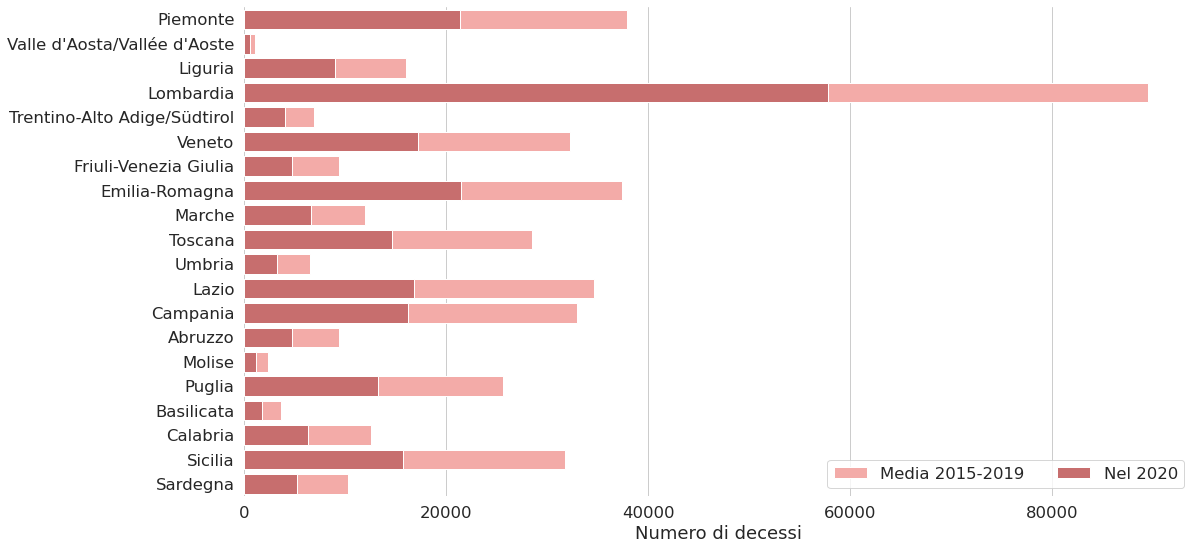

In [348]:
print('              CONFRONTO DEFUNTI MEDIA 2015-2019 / DEFUNTI NEL 2020')

f, ax = plt.subplots(figsize=(17, 9))

sns.set_color_codes("pastel")
sns.barplot(x="Totali", y='Regione', data = dfreg,
            label="Media 2015-2019", color="r")

sns.set_color_codes("muted")
sns.barplot(x='2020', y='Regione', data = dfreg,
            label="Nel 2020", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Numero di decessi")
sns.despine(left=True, bottom=True)

plt.savefig('barplot.png')

**Figura 1:** ciascuna barra orizzontale rappresenta il numero di decessi totali registrati nei mesi marzo-giugno rispettivamente: in colore scuro nell'anno 2020, in colore chiaro valor medio degli anni 2015-2019. Le barre orizzontali evidenziano una tendenza che verrà sottolineata nuovamente nella figura 2, ossia che il totale di decessi regionali nel periodo di pandemia (2020) e in quello di "normalità" si discostano maggiormente se ci riferiamo a regioni collocate al nord. Come ampiamente riscontrato in quest'ultimo anno, infatti, i numeri di contagi e di decessi legati alla pandemia indicano che il nord (epicentro del contagio) sia stato maggiormente colpito. 

In [14]:
nord_1519 = 0
nord_2020 = 0
centro_1519, centro_2020, sud_1519, sud_2020 = 0, 0, 0, 0

for i in range(N):
    if(mydf.Fascia_geografica[i]=='Nord'):
        nord_1519+= mydf.Totali_1519[i]
        nord_2020+= mydf.Totali_2020[i]
    if(mydf.Fascia_geografica[i]=='Centro'):
        centro_1519+= mydf.Totali_1519[i]
        centro_2020+= mydf.Totali_2020[i]
    if(mydf.Fascia_geografica[i]=='Sud'):
        sud_1519+= mydf.Totali_1519[i]
        sud_2020+= mydf.Totali_2020[i]

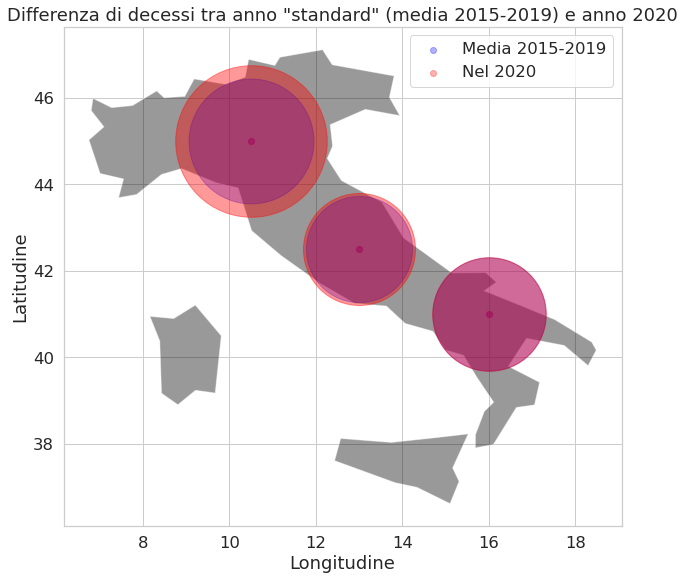

In [349]:
world= geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
italy = world[world.name=='Italy']
italy.plot(figsize=(10,10), color='black', alpha=0.4)
plt.title('Differenza di decessi tra anno "standard" (media 2015-2019) e anno 2020')
plt.scatter(10.5,45, alpha=0.3, color='blue', label='Media 2015-2019')
plt.scatter(10.5,45, alpha=0.3, color='red', label='Nel 2020')
plt.scatter(10.5,45, s=nord_1519*2e-1, alpha=0.3, color='blue')
plt.scatter(10.5,45, s=nord_2020*2e-1, alpha=0.4, color='red')
plt.scatter(13,42.5, alpha=0.3, color='blue')
plt.scatter(13,42.5, alpha=0.3, color='red')
plt.scatter(13,42.5, s=centro_1519*2e-1, alpha=0.3, color='blue')
plt.scatter(13,42.5, s=centro_2020*2e-1, alpha=0.4, color='red')
plt.scatter(16,41, alpha=0.3, color='blue')
plt.scatter(16,41, alpha=0.3, color='red')
plt.scatter(16,41, s=sud_1519*2e-1, alpha=0.3, color='blue')
plt.scatter(16,41, s=sud_2020*2e-1, alpha=0.4, color='red')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.legend()
plt.savefig('italy.png')
plt.show()

**Figura 2:** in figura è possibile distinguere tre indicatori circolari, collocati in tre punti rappresentati le fasce geografiche in cui ho suddiviso il paese. Per ciascuna geolocalizzazione ho sovrapposto due indicatori: in blu, pesato sul numero di decessi totali medi nel quinquennio 2015-2019, in rosso, pesato sul numero di decessi totali registrati nei mesi del 2020. Si evince in modo chiaro che la discrepanza tra i due dati sia molto più accentuata al nord e diminuisca spostandosi verso sud.

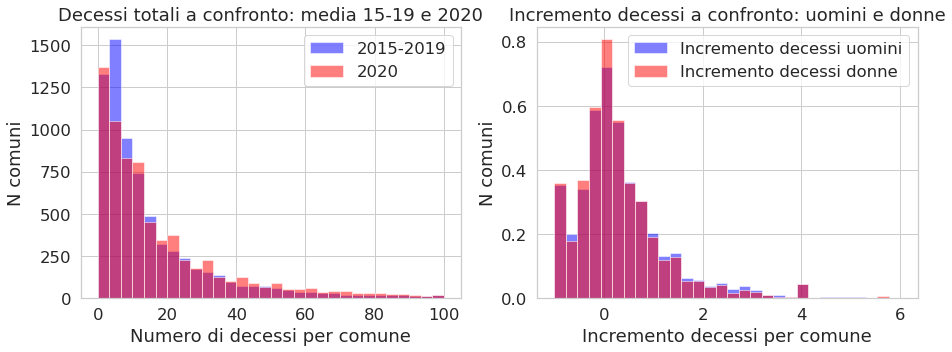

In [350]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Decessi totali a confronto: media 15-19 e 2020')
plt.hist(mydf.Totali_1519, bins=30, range=(0,100), alpha=0.5, density=False, color='blue', label='2015-2019')
plt.hist(mydf.Totali_2020, bins=30, range=(0,100), alpha=0.5, density=False, color='red', label='2020')
plt.xlabel('Numero di decessi per comune')
plt.ylabel('N comuni')
plt.legend()

plt.subplot(1,2,2)
plt.title('Incremento decessi a confronto: uomini e donne')
plt.hist(mydf.Incremento_uomini, bins=30, range=(-1,6), alpha=0.5, density=True, color='blue', label='Incremento decessi uomini')
plt.hist(mydf.Incremento_donne, bins=30, range=(-1,6), alpha=0.5, density=True, color='red', label='Incremento decessi donne')
plt.xlabel('Incremento decessi per comune')
plt.ylabel('N comuni')

plt.legend()

plt.show()

**Figura 3:** in ultima analisi qualitativa ho voluto mettere a confronto i decessi totali registrati in un anno "standard" (2015-2019) con la stessa variabile registrata nell'anno dell'epidemia. Ho voluto evidenziare questo confronto in due modi: <font color='brown'>[a sinistra]</font>, sovrapponendo gli istogrammi relativi ai due periodi e <font color='brown'>[a destra]</font> studiando l'incremento dei decessi registrato nei comuni con classificazione di genere. Dal grafico a destra si notano incrementi nel numero dei decessi molto alti (in percentuale) rispetto ai casi in cui si registrano decrementi. Cionostante l'avvenire della panemia non ha escluso il verificarsi di numerose diminuzioni nel numero dei decessi per comune (coda sinistra della distribuzione). 

Il grafico di destra suggerisce inoltre che il genere femminile sia stato meno sottoposto a bruschi incrementi di mortalità, dominando i bin collocati nel centro (0) della distribuzione.

# 3. Analisi della correlazione

Per svolgere l'analisi di correlazione ho deciso inizialmente di visualizzare la clustermap relativa al DataFrame <font color='brown'>mydf</font> che, come si nota in figura 4, evidenzia una forte correlazione tra le variabili che rappresentano i decessi totali

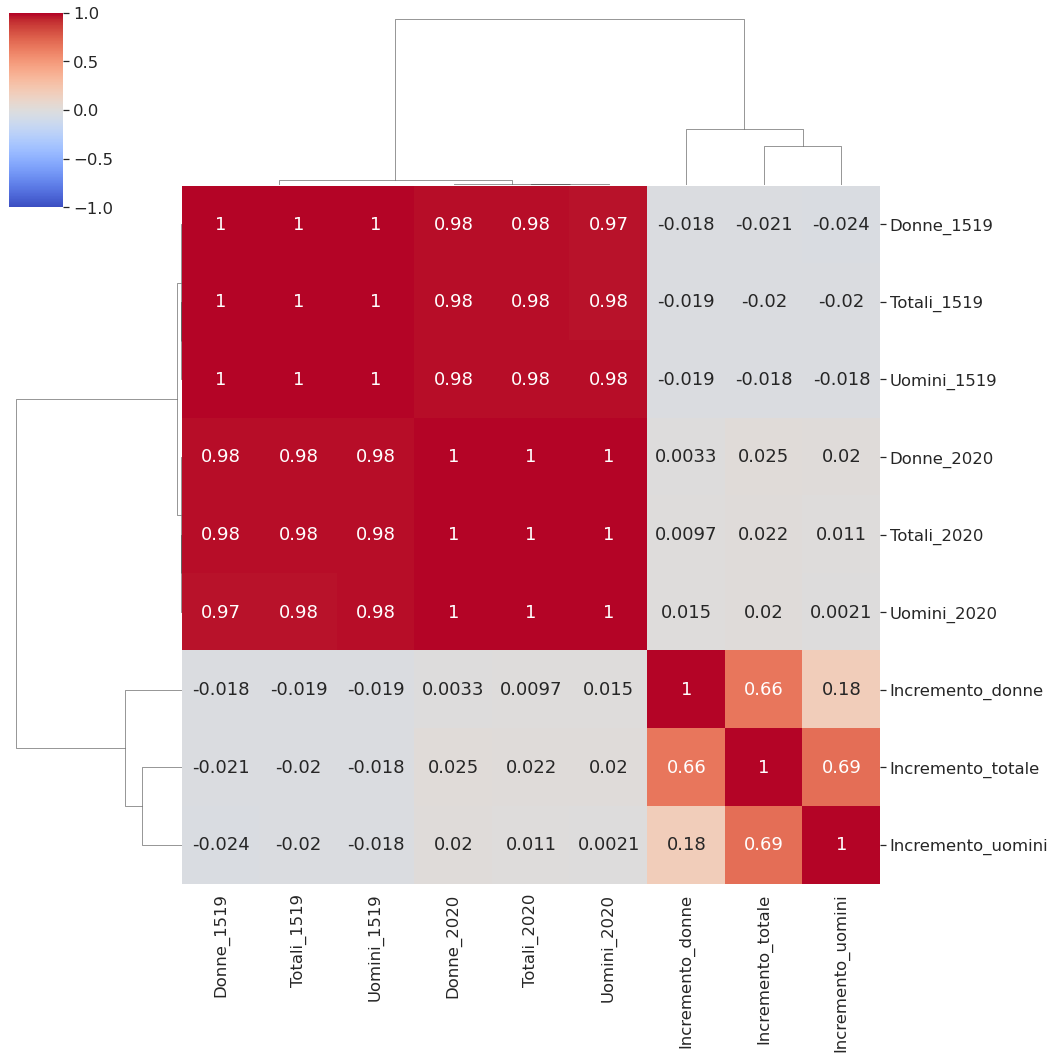

In [353]:
sns.clustermap(mydf.corr(), annot=True, figsize=(15,15), vmin=-1, vmax=+1, cmap='coolwarm')
plt.show()

**Figura 4:** (..............)

       GRAFICO A DISPERSIONE DI ln(decessi 15-19) - ln(decessi 2020) IN PROVINCE


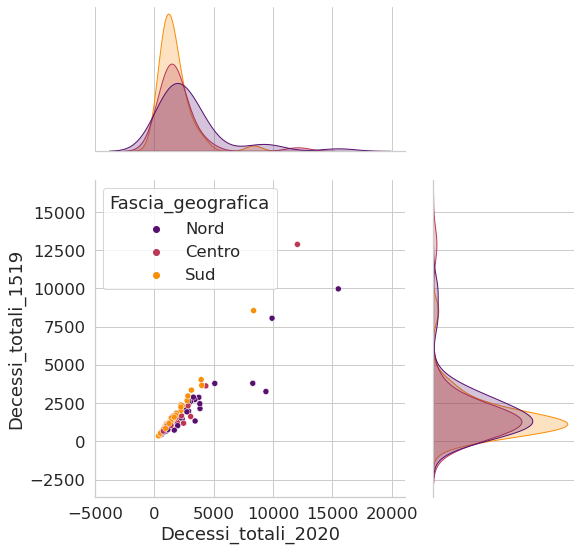

In [354]:

print('       GRAFICO A DISPERSIONE DI ln(decessi 15-19) - ln(decessi 2020) IN PROVINCE')
g = sns.jointplot(data = dfprov, kind='scatter', hue='Fascia_geografica', x='Decessi_totali_2020', y='Decessi_totali_1519', height=8,ratio=2, palette='inferno')
plt.savefig('carina.png')

**Figura 5:** grafico a dispersione del numero di decessi totale medio registrato per provincia negli anni 2015-1019 e nel corso dell'anno 2020. 

Media nord > media centro > media sud

correlazione ~ +1

# 4. Stima puntuale di parametri e test di bontà dei fit
## Riferimento al DataFrame provinciale

In [19]:
fit_norm_1519 = sc.norm.fit(np.log(morti_prov_1519))
fit_norm_2020 = sc.norm.fit(np.log(morti_prov_2020))
fit_gamm_2020 = sc.gamma.fit(np.log(morti_prov_2020)) 

print('STIME PUNTUALI ML GAMMA FIT 1519: ',fit_gamm_2020)
print('STIME PUNTUALI ML GAMMA FIT 2020: ',fit_gamm_2020)
print('STIME PUNTUALI ML GAUSS FIT 2020: ',fit_norm_2020)


y = np.linspace(1,max(morti_prov_2020), 10000)
log_y = np.log(y)

pdf_norm_1519 = sc.norm.pdf(log_y, fit_norm_1519[0], fit_norm_1519[1])
pdf_norm_2020 = sc.norm.pdf(log_y, fit_norm_2020[0], fit_norm_2020[1])
pdf_gamm_2020 = sc.gamma.pdf(log_y, fit_gamm_2020[0], fit_gamm_2020[1], fit_gamm_2020[2])

cdf_norm_2020 = sc.norm.cdf(log_y, fit_norm_2020[0], fit_norm_2020[1])
cdf_gamm_2020 =  sc.gamma.cdf(log_y, fit_gamm_2020[0], fit_gamm_2020[1], fit_gamm_2020[2])


STIME PUNTUALI ML GAMMA FIT 1519:  (11.297550955914758, 5.0394388524664455, 0.2112538791690216)
STIME PUNTUALI ML GAMMA FIT 2020:  (11.297550955914758, 5.0394388524664455, 0.2112538791690216)
STIME PUNTUALI ML GAUSS FIT 2020:  (7.426090395065081, 0.7132801625784653)


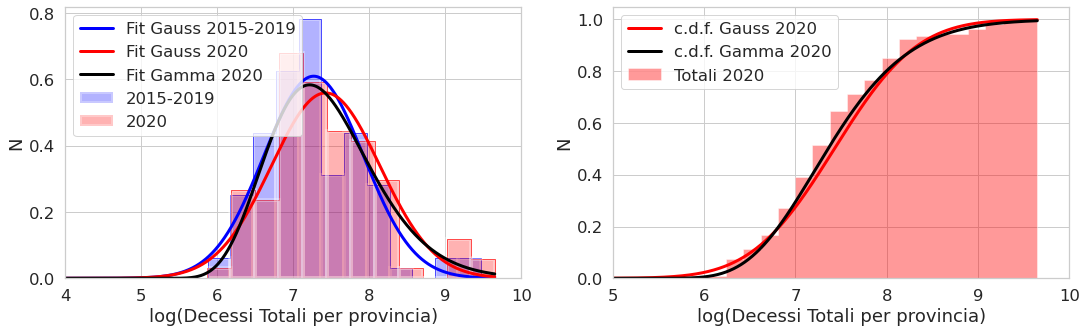

In [355]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.hist(np.log(morti_prov_1519), bins=12, alpha=1, color='blue', histtype='step', density=True)
plt.hist(np.log(morti_prov_2020), bins=12, alpha=1, color='red', histtype='step', density=True)
plt.hist(np.log(morti_prov_1519), bins=12, alpha=0.3, color='blue', linewidth=4, label='2015-2019', density=True)
plt.hist(np.log(morti_prov_2020), bins=12, alpha=0.3, color='red', linewidth=4, label='2020', density=True)
plt.plot(log_y, pdf_norm_1519, color='blue', linewidth=3, label='Fit Gauss 2015-2019')
plt.plot(log_y, pdf_norm_2020, color='red', linewidth=3, label='Fit Gauss 2020')
plt.plot(log_y, pdf_gamm_2020, color='black', linewidth=3, label='Fit Gamma 2020')
plt.xlim(4,10)
plt.ylabel('N')
plt.xlabel('log(Decessi Totali per provincia)')
plt.legend()

plt.subplot(1,2,2)
plt.hist(np.log(morti_prov_2020), cumulative=True, color='red', density= True, bins= 20, linewidth=1, alpha=0.4, label='Totali 2020', histtype='stepfilled')
plt.plot(log_y, cdf_norm_2020, color='red', linewidth=3, label='c.d.f. Gauss 2020')
plt.plot(log_y, cdf_gamm_2020, color='black', linewidth=3, label='c.d.f. Gamma 2020')
plt.ylabel('N')
plt.xlabel('log(Decessi Totali per provincia)')

plt.xlim(5,10)
plt.legend()
plt.savefig('fit.png')
plt.show()

In [21]:
print(sc.kstest(np.log(morti_prov_2020), 'norm', args=(fit_norm_1519[0], fit_norm_1519[1])))
print(sc.kstest(np.log(morti_prov_1519), 'norm', args=(fit_norm_2020[0], fit_norm_2020[1])))
print(sc.kstest(np.log(morti_prov_2020), 'gamma', args=(fit_gamm_2020[0], fit_gamm_2020[1], fit_gamm_2020[2])))

KstestResult(statistic=0.09128581813488923, pvalue=0.31642102654559723)
KstestResult(statistic=0.1855265505229905, pvalue=0.001070695604502868)
KstestResult(statistic=0.04299265861587903, pvalue=0.988986518364676)


# 5. Confronto tra campioni di dati diversi e KS-Test

In [22]:
def test_reg_reg(nome):
    
    tester = 0
    df_rif = mydf[mydf.Regione==nome]
    
    for i in range(len(regioni)):
        df_reg = mydf[mydf.Regione==regioni[i]]
        ktest = sc.ks_2samp(df_rif.Totali_2020, df_reg.Totali_2020)
       # print('KS-Test tra ', nome, ' e ', regioni[i], ': ', ktest[1])
      #  print('                  ')
        if(ktest[1]!=1):
            if(tester<ktest[1]):
                index = i
            tester=max(tester, ktest[1])

    print('  ')
    print('  ')
    print('MIGLIOR P-VALUE: ', tester, ',  REGISTRATO TRA: ', nome, ' e ', regioni[index])
    print('+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +')
    print('Il campione riguardante i defunti totali nei mesi gennaio-giugno del  2020 della regione che risulta più compatibile con quello di ', nome, 'riguarda la regione ', regioni[index], '!!!')
           

In [23]:
test_reg_reg('Marche')

  
  
MIGLIOR P-VALUE:  0.3849045624147843 ,  REGISTRATO TRA:  Marche  e  Campania
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + +
Il campione riguardante i defunti totali nei mesi gennaio-giugno del  2020 della regione che risulta più compatibile con quello di  Marche riguarda la regione  Campania !!!


In [356]:
PValues = np.zeros((20,20))

for i in range(20):
    df_reg_host = mydf[mydf.Regione==regioni[i]]
    
    for j in range(20):
        df_reg = mydf[mydf.Regione==regioni[j]]
    
        PValues[i][j]=sc.ks_2samp(df_reg_host.Totali_2020, df_reg.Totali_2020)[1]

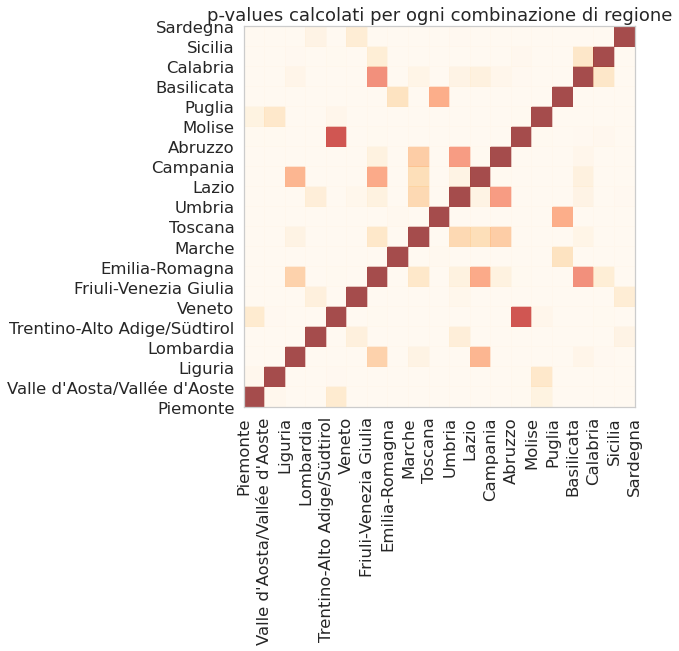

In [357]:
fig, ax = plt.subplots(figsize=(7,7))
plt.title('p-values calcolati per ogni combinazione di regione')
ax.pcolormesh(regioni, regioni, PValues, cmap='OrRd', vmin=0, vmax=+1, alpha=0.7)
plt.xticks(rotation=90)
plt.savefig('pv.png')
plt.show()


## Nuova impronta al notebook: analisi dell'incremento

In [212]:
# la scelta: pongo uguali a zero gli incrementi negativi
my_df_nord = mydf[mydf.Fascia_geografica=='Nord']
my_df_sud = mydf[mydf.Fascia_geografica=='Sud']
my_df_centro = mydf[mydf.Fascia_geografica=='Centro']


mydf_cor = mydf[mydf.Incremento_totale>0]


In [314]:
sud_fit = sc.norm.fit(my_df_sud.Incremento_totale)
sud_fit_g = sc.gamma.fit(my_df_sud.Incremento_totale)
cen_fit_g = sc.gamma.fit(my_df_centro.Incremento_totale)
nor_fit_g = sc.gamma.fit(my_df_nord.Incremento_totale)


sud_fit_l = sc.laplace.fit(my_df_sud.Incremento_totale)

zz = np.linspace(-1.5,4, 10000)

sud_pdf = sc.norm.pdf(zz, sud_fit[0],sud_fit[1])
sud_pdf_g = sc.gamma.pdf(zz, sud_fit_g[0], sud_fit_g[1], sud_fit_g[2])
sud_pdf_l = sc.laplace.pdf(zz, sud_fit_l[0],sud_fit_l[1])

cen_pdf_g = sc.gamma.pdf(zz, cen_fit_g[0], cen_fit_g[1], cen_fit_g[2])
nor_pdf_g = sc.gamma.pdf(zz, nor_fit_g[0], nor_fit_g[1], nor_fit_g[2])

print('STIMATORI DI ML PER MODELLO GAMMA E CAMPIONE NORD   :', nor_fit_g)
print('STIMATORI DI ML PER MODELLO GAMMA E CAMPIONE CENTRO :', cen_fit_g)
print('STIMATORI DI ML PER MODELLO GAMMA E CAMPIONE SUD    :', sud_fit_g)


nor_cdf_g = sc.gamma.pdf(zz, nor_fit_g[0], nor_fit_g[1], nor_fit_g[2])

sud_cdf = sc.norm.cdf(zz, sud_fit[0],sud_fit[1])
sud_cdf_g = sc.gamma.cdf(zz, sud_fit_g[0], sud_fit_g[1], sud_fit_g[2])
sud_cdf_l = sc.laplace.cdf(zz, sud_fit_l[0],sud_fit_l[1])


STIMATORI DI ML PER MODELLO GAMMA E CAMPIONE NORD   : (4.575959794617421, -1.4400255127009924, 0.4328848247241948)
STIMATORI DI ML PER MODELLO GAMMA E CAMPIONE CENTRO : (12.822980510838722, -1.6779374480114495, 0.1405678319702503)
STIMATORI DI ML PER MODELLO GAMMA E CAMPIONE SUD    : (21.30772130408525, -1.9722488736362171, 0.09371482134087583)


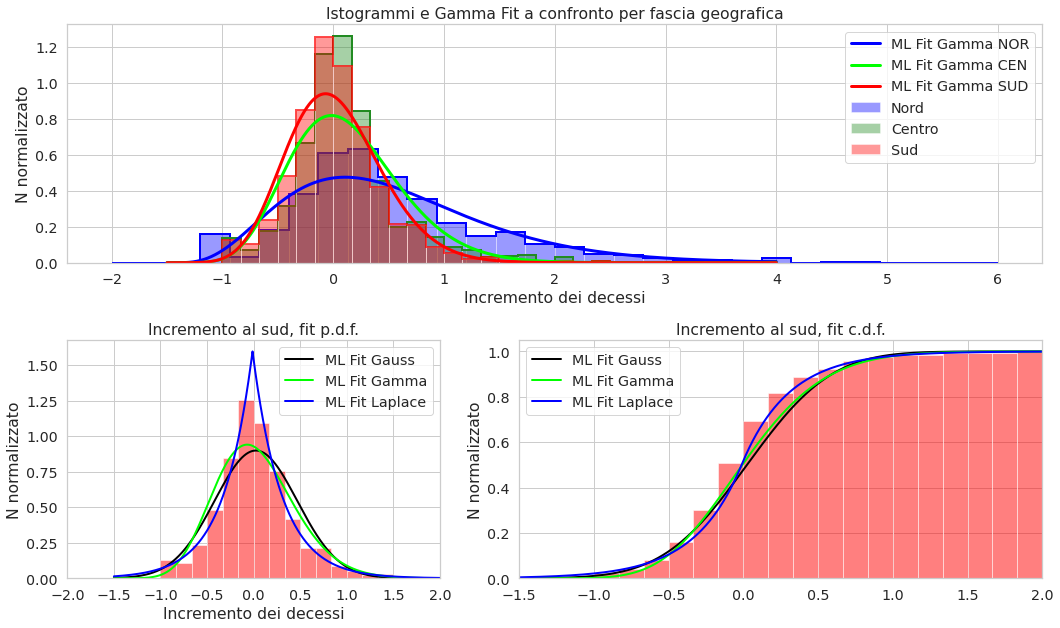

In [364]:
plt.figure(figsize=(15,9))

plt.subplot(2,7,(1,7))
plt.title('Istogrammi e Gamma Fit a confronto per fascia geografica')
plt.hist(my_df_nord.Incremento_totale, bins=30, alpha=0.4, density=True, color='blue', label='Nord', range=(-2,6))
plt.hist(my_df_nord.Incremento_totale, bins=30, alpha=1, histtype='step', linewidth=2, density=True, color='blue', range=(-2,6))
plt.plot(zz, nor_pdf_g, label='ML Fit Gamma NOR', color='blue', linewidth=3)

plt.hist(my_df_centro.Incremento_totale, bins=30, alpha=0.4, density=True, color='forestgreen', label='Centro')
plt.hist(my_df_centro.Incremento_totale, bins=30, alpha=1, histtype='step', linewidth=2, density=True, color='forestgreen')
plt.plot(zz, cen_pdf_g, label='ML Fit Gamma CEN', color='lime', linewidth=3)

plt.hist(my_df_sud.Incremento_totale, bins=30, alpha=0.4, density=True, color='red', label='Sud')
plt.hist(my_df_sud.Incremento_totale, bins=30, alpha=0.7, histtype='step', linewidth=2, density=True, color='red')
plt.plot(zz, sud_pdf_g, label='ML Fit Gamma SUD', color='red', linewidth=3)

plt.xlabel('Incremento dei decessi')
plt.ylabel('N normalizzato')


plt.legend()
plt.subplot(2,7,(8,10))
plt.title('Incremento al sud, fit p.d.f.')
plt.hist(my_df_sud.Incremento_totale, bins=30, alpha=0.5, density=True, color='red')
plt.plot(zz, sud_pdf, label='ML Fit Gauss', color='black', linewidth=2)
plt.plot(zz, sud_pdf_g, label='ML Fit Gamma', color='lime', linewidth=2)
plt.plot(zz, sud_pdf_l, label='ML Fit Laplace', color='blue', linewidth=2)
plt.xlim(-2,2)
plt.xlabel('Incremento dei decessi')
plt.ylabel('N normalizzato')
plt.legend()


plt.subplot(2,7,(11,14))
plt.title('Incremento al sud, fit c.d.f.')
plt.hist(my_df_sud.Incremento_totale, bins=30, alpha=0.5, density=True, color='red', cumulative=True)
plt.plot(zz, sud_cdf, label='ML Fit Gauss', color='black', linewidth=2)
plt.plot(zz, sud_cdf_g, label='ML Fit Gamma', color='lime', linewidth=2)
plt.plot(zz, sud_cdf_l, label='ML Fit Laplace', color='blue', linewidth=2)
plt.xlim(-1.5,2)
plt.ylabel('N normalizzato')
plt.legend()

plt.tight_layout()

plt.savefig('diff.png')

plt.show()

In [279]:
print(sc.kstest(my_df_sud.Incremento_totale, 'laplace', args=(sud_fit_l[0], sud_fit_l[1]), N=len(my_df_sud)))
print(sc.kstest(my_df_sud.Incremento_totale, 'norm', args=(sud_fit[0], sud_fit_l[1]), N=len(my_df_sud)))
print(sc.kstest(my_df_centro.Incremento_totale, mypdf, args=(0.0,0.32,0.0,25.) ))

KstestResult(statistic=0.028413521208040526, pvalue=0.04543399925840642)
KstestResult(statistic=0.06262102366563649, pvalue=2.1563797406376535e-08)
KstestResult(statistic=0.9659142484413515, pvalue=0.0)


In [275]:
sc.kstest?

In [185]:
dati = mydf_inc.Incremento_totale

efit = sc.expon.fit(dati)
gfit = sc.gamma.fit(dati)

efit_m = sc.expon.fit(mydf_cor.Incremento_uomini)
efit_f = sc.expon.fit(mydf_cor.Incremento_donne)


z = np.linspace(0.01,9,10000)
print('STIMATORI PUNTUALI DI ML E MODELLO ESPONENZIALE :', efit)
print('STIMATORI PUNTUALI DI ML E MODELLO A GAMMA      :', efit)

epdf = sc.expon.pdf(z, efit[0], efit[1])
gpdf = sc.gamma.pdf(z, gfit[0], gfit[1], gfit[2])
ecdf = sc.expon.cdf(z, efit[0], efit[1])
gcdf = sc.gamma.cdf(z, gfit[0], gfit[1], gfit[2])

epdf_m = sc.expon.pdf(z, efit_m[0], efit_m[1])
epdf_f = sc.expon.pdf(z, efit_f[0], efit_f[1])

STIMATORI PUNTUALI DI ML E MODELLO ESPONENZIALE : (0.0012062726176115116, 0.7025972800165486)
STIMATORI PUNTUALI DI ML E MODELLO A GAMMA      : (0.0012062726176115116, 0.7025972800165486)


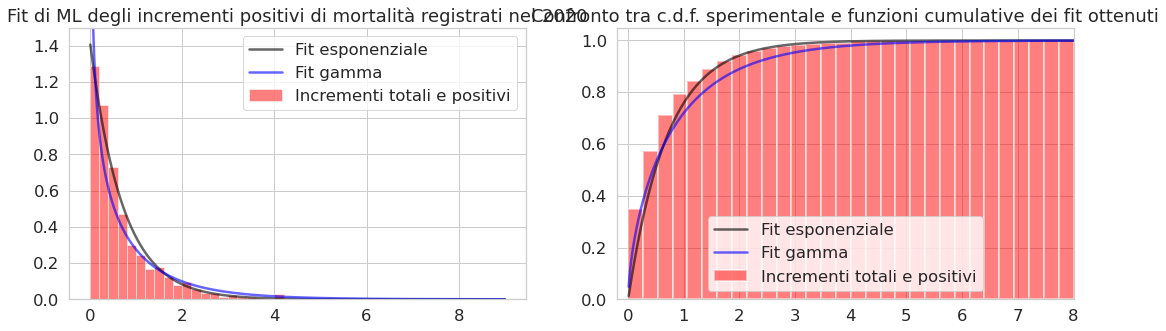

In [360]:
plt.rcParams.update({'font.size': 18})


A = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(2, 2)




plt.subplot(1,2,1)
plt.title('Fit di ML degli incrementi positivi di mortalità registrati nel 2020')

plt.hist(dati, bins=30, density=True, color='red', alpha=0.5, range=(0,6), label='Incrementi totali e positivi')
plt.plot(z, epdf, linewidth=2.5, color='black', label='Fit esponenziale', alpha=0.6)
plt.plot(z, gpdf, linewidth=2.5, color='blue', label='Fit gamma', alpha=0.6)
plt.ylim(0,1.5)
plt.legend()

plt.subplot(1,2,2)
plt.title('Confronto tra c.d.f. sperimentale e funzioni cumulative dei fit ottenuti')

plt.hist(dati, cumulative=True, alpha=0.5, color='red', range=(0,8), density=True, bins=30, linewidth=2, label='Incrementi totali e positivi')
plt.plot(z, ecdf, linewidth=2.5, color='black', label='Fit esponenziale', alpha=0.6)
plt.plot(z, gcdf, linewidth=2.5, color='blue', label='Fit gamma', alpha=0.6)
plt.legend()
plt.xlim(-0.2,8)
plt.savefig('testt.png')



plt.show()

In [120]:
print(sc.kstest(dati, 'expon', args=(efit[0],efit[1]), N=N))
print(sc.kstest(dati, 'gamma', args=(gfit[0],gfit[1], gfit[2]), N=N))

KstestResult(statistic=0.05213466528912969, pvalue=5.216288184801154e-11)
KstestResult(statistic=0.09754787963669612, pvalue=1.7718536291943593e-37)


In [367]:
PV_decessi = np.zeros((20,20))
PV_increm  = np.zeros((20,20)) 


for i in range(20):
    df_reg_host = mydf[mydf.Regione==regioni[i]]
    
    for j in range(20):
        df_reg = mydf[mydf.Regione==regioni[j]]
    
        PV_decessi[i][j]=sc.ks_2samp(df_reg_host.Totali_2020, df_reg.Totali_2020)[1]
        PV_increm[i][j]=sc.ks_2samp(df_reg_host.Incremento_totale, df_reg.Incremento_totale)[1]

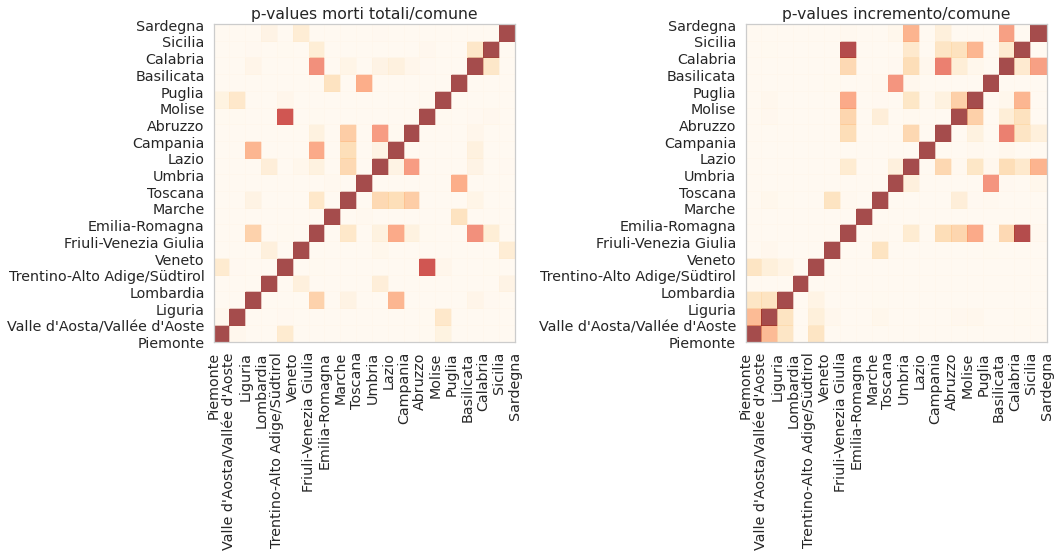

In [377]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('p-values morti totali/comune')
plt.pcolormesh(regioni, regioni, PV_decessi, cmap='OrRd', vmin=0, vmax=+1, alpha=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('p-values incremento/comune')
plt.pcolormesh(regioni, regioni, PV_increm, cmap='OrRd', vmin=0, vmax=+1, alpha=0.7)
plt.xticks(rotation=90)
plt.savefig('pv.png')

plt.tight_layout()

plt.show()